# 目的

$P(P_{11}, \cdots, P_{33} | Q_{11}, \cdots, Q_{22} )$を調べたい。

# 原理
ベイズの定理より

$P(P_{11}, \cdots, P_{33} | Q_{11}, \cdots, Q_{22} ) = \frac{P( Q_{11}, \cdots, Q_{22}  | P_{11}, \cdots, P_{33})}{\sum_{P_{ij}} P( Q_{11}, \cdots, Q_{22}  | P_{11}, \cdots, P_{33}) }$
が成り立つ。

$(P_{11},\cdots, P_{33}) = (1,\cdots, 1)$から$(0, \cdots, 0)$までの$2^{9}$通り

$(A_{11},\cdots, A_{22}) = (1,\cdots, 1)$から$(-1, \cdots, -1)$までの$3^{4}$通り

## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as iter
import sqlite3

## データベース構築

FileName:data_set 

Colomn=[original, observe]

In [2]:
con = sqlite3.connect("data.db")
cursor = con.cursor()
#cursor.execute("CREATE TABLE data_set(original, observe)")
p = "INSERT INTO data_set(original, observe) VALUES(?, ?)"

データベース削除用 

In [26]:
#DELETE ALL DATA
cursor.execute('delete from data_set')
cursor.execute('select * from data_set')
cursor.fetchall()

OperationalError: no such table: data_set

## 真値(P行列)から観測値(Q行列)を計算

In [3]:
def calculation(p_array):
    for a_11,a_12,a_21,a_22 in iter.product([-1,0,1],[-1,0,1],[-1,0,1],[-1,0,1]):
        q_11 = p_array[0][0] * a_12 + p_array[0][1] * a_21 + p_array[1][0] * a_22 + p_array[1][1] * a_22
        q_12 = p_array[0][1] * a_12 + p_array[0][2] * a_21 + p_array[1][1] * a_22 + p_array[1][2] * a_22
        q_21 = p_array[1][0] * a_12 + p_array[1][1] * a_21 + p_array[2][0] * a_22 + p_array[2][1] * a_22
        q_22 =p_array[1][1] * a_12 + p_array[1][2] * a_21 + p_array[2][1] * a_22 + p_array[2][2] * a_22
        q_array = np.array([[q_11,q_12],[q_21,q_22]])
        cursor.execute(p, (str(p_array),str(q_array)))
        con.commit()

Pのすべての組み合わせを計算し、データベースに保存する。

In [32]:
for p_11,p_12,p_13,p_21,p_22,p_23,p_31,p_32,p_33 in iter.product([0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]):
    p_array = np.array([[p_11,p_12,p_13],[p_21,p_22,p_23],[p_31,p_32,p_33]])
    calculation(p_array)

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0]
 [0 0 0]
 [0 0 1]]
[[0 0 0]
 [0 0 0]
 [0 1 0]]
[[0 0 0]
 [0 0 0]
 [0 1 1]]
[[0 0 0]
 [0 0 0]
 [1 0 0]]
[[0 0 0]
 [0 0 0]
 [1 0 1]]
[[0 0 0]
 [0 0 0]
 [1 1 0]]
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[0 0 0]
 [0 0 1]
 [0 0 0]]
[[0 0 0]
 [0 0 1]
 [0 0 1]]
[[0 0 0]
 [0 0 1]
 [0 1 0]]
[[0 0 0]
 [0 0 1]
 [0 1 1]]
[[0 0 0]
 [0 0 1]
 [1 0 0]]
[[0 0 0]
 [0 0 1]
 [1 0 1]]
[[0 0 0]
 [0 0 1]
 [1 1 0]]
[[0 0 0]
 [0 0 1]
 [1 1 1]]
[[0 0 0]
 [0 1 0]
 [0 0 0]]
[[0 0 0]
 [0 1 0]
 [0 0 1]]
[[0 0 0]
 [0 1 0]
 [0 1 0]]
[[0 0 0]
 [0 1 0]
 [0 1 1]]
[[0 0 0]
 [0 1 0]
 [1 0 0]]
[[0 0 0]
 [0 1 0]
 [1 0 1]]
[[0 0 0]
 [0 1 0]
 [1 1 0]]
[[0 0 0]
 [0 1 0]
 [1 1 1]]
[[0 0 0]
 [0 1 1]
 [0 0 0]]
[[0 0 0]
 [0 1 1]
 [0 0 1]]
[[0 0 0]
 [0 1 1]
 [0 1 0]]
[[0 0 0]
 [0 1 1]
 [0 1 1]]
[[0 0 0]
 [0 1 1]
 [1 0 0]]
[[0 0 0]
 [0 1 1]
 [1 0 1]]
[[0 0 0]
 [0 1 1]
 [1 1 0]]
[[0 0 0]
 [0 1 1]
 [1 1 1]]
[[0 0 0]
 [1 0 0]
 [0 0 0]]
[[0 0 0]
 [1 0 0]
 [0 0 1]]
[[0 0 0]
 [1 0 0]
 [0 1 0]]
[[0 0 0]
 [1 0 0]
 [

## 特定のQ行列(観測データ)からP行列になる回数

In [4]:
def visualize_fixedQ(q_11,q_12,q_21,q_22):
    Q = np.array([[q_11,q_12],[q_21,q_22]])
    cursor.execute("select original, observe, count(original) from data_set where observe = '" + str(Q) + "' group by original;")
    data_set = cursor.fetchall()
    total = len(data_set)    
    
    if total >= 10:
        print("TOO MANY LABELS")
    else:
        pass
    
    names = [data_set[i][0] for i in range(total)]
    values = [data_set[i][2] for i in range(total)]
    
    print(values)
    plt.figure(dpi = 100,figsize=(20,4))
    
    plt.xlabel("P Matrix")
    plt.ylabel("Number of observed times")
    plt.bar(names, values)
    plt.show()
    
    

## 特定のP行列(真値)からQ行列(観測データ)になる回数

In [6]:
def visualize_fixedP(p_11,p_12,p_13,p_21,p_22,p_23,p_31,p_32,p_33):
    P = np.array([[p_11,p_12,p_13],[p_21,p_22,p_23],[p_31,p_32,p_33]])
    cursor.execute("select original, observe, count(original) from data_set where original = '" + str(P) + "' group by observe;")
    data_set = cursor.fetchall()
    total = len(data_set)
    
    
    if total >= 10:
        print("TOO MANY LABELS")
    else:
        pass
    
    names = [data_set[i][1] for i in range(total)]
    values = [data_set[i][2] for i in range(total)]
    
    print(values)
    plt.figure(dpi = 100,figsize=(20,4))
    
    plt.xlabel("Q Matrix")
    plt.ylabel("Number of observed times")
    plt.bar(names, values)
    plt.show()

[9, 3, 3, 3, 3]


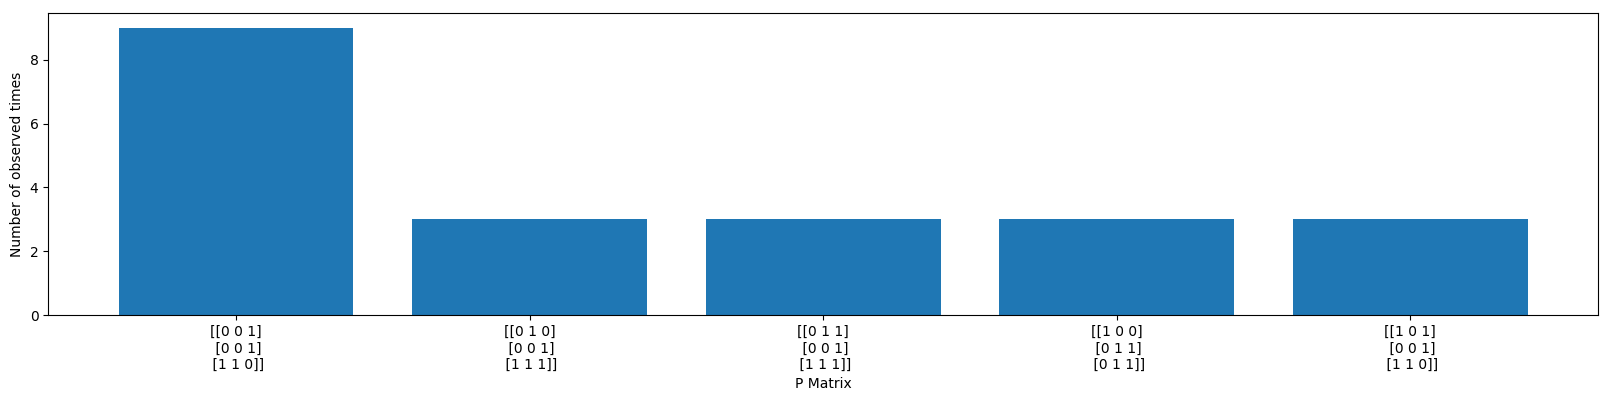

[9, 9, 9, 9, 9, 9, 9, 9, 9]


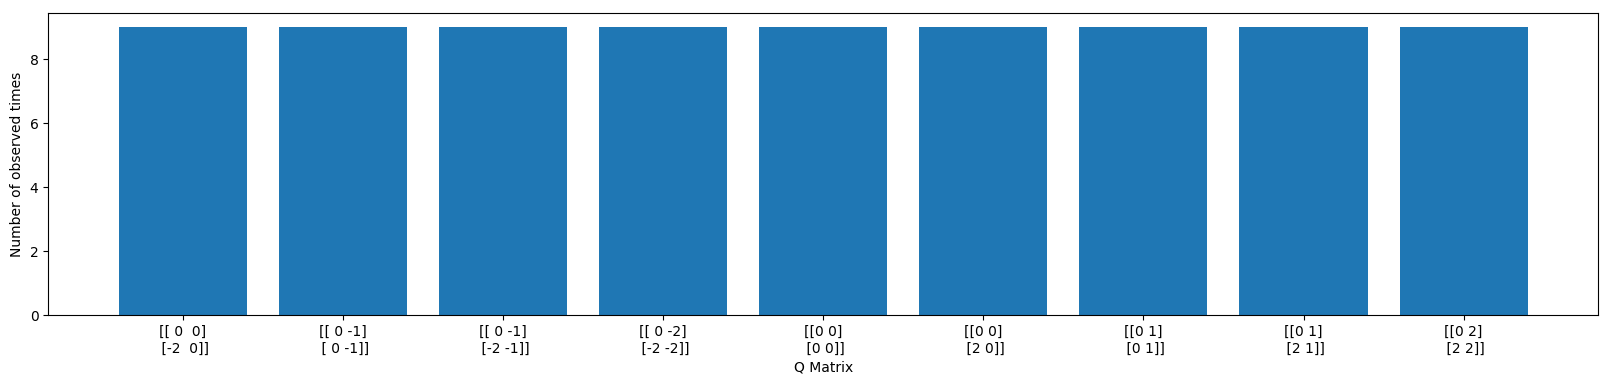

TOO MANY LABELS
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


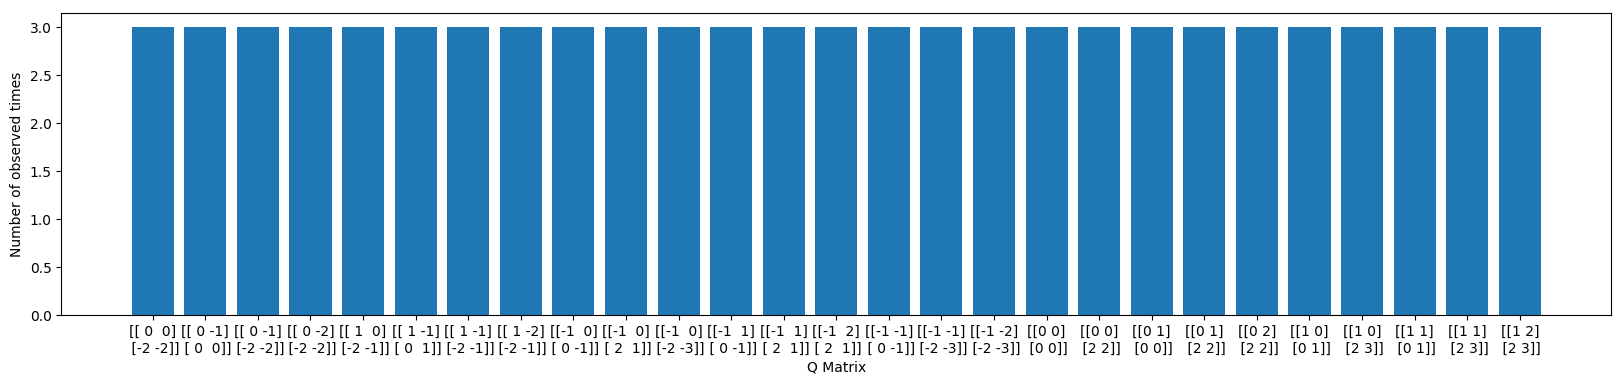

TOO MANY LABELS
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


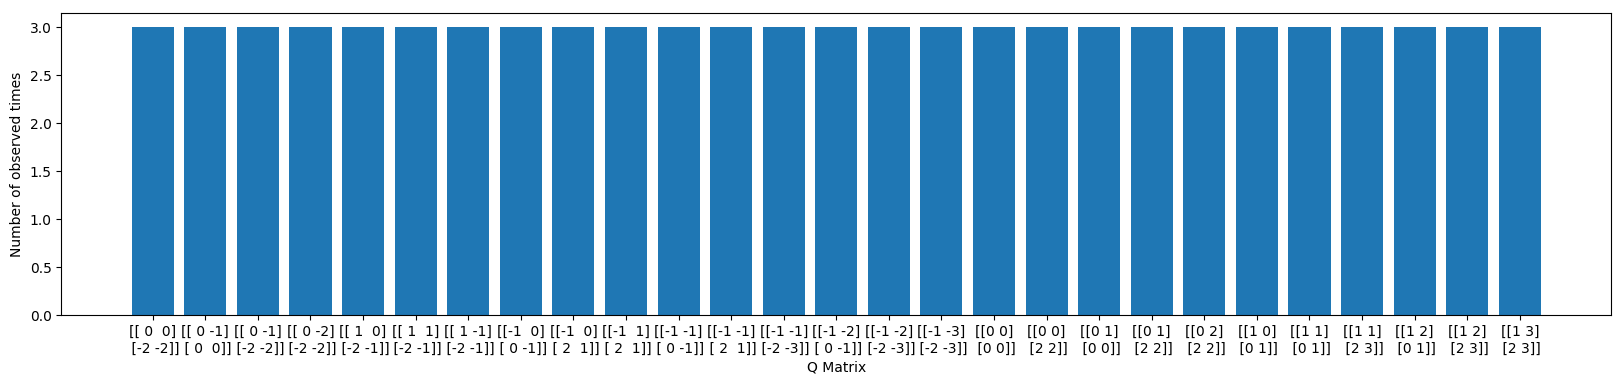

TOO MANY LABELS
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


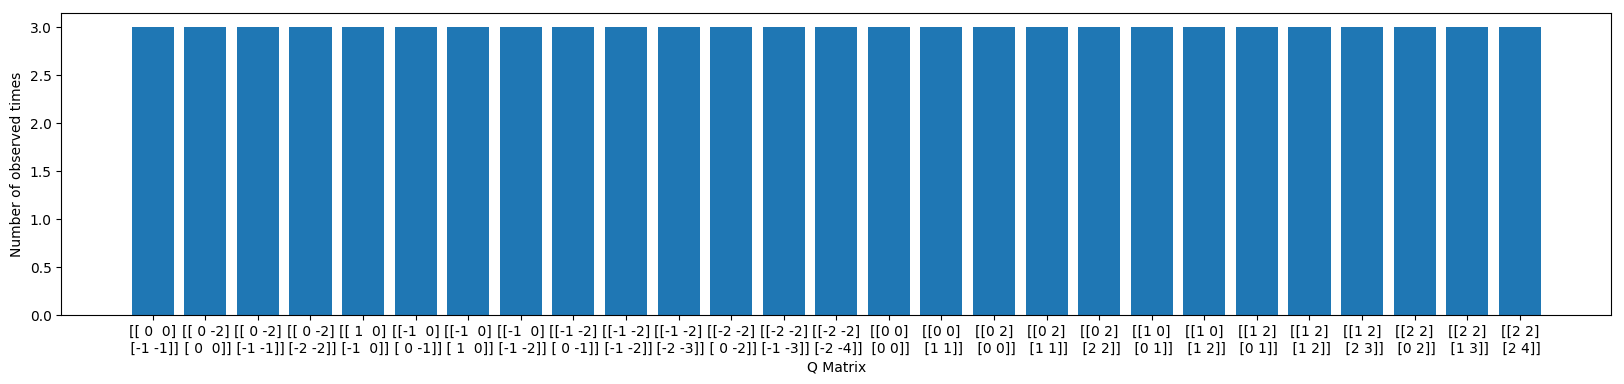

TOO MANY LABELS
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


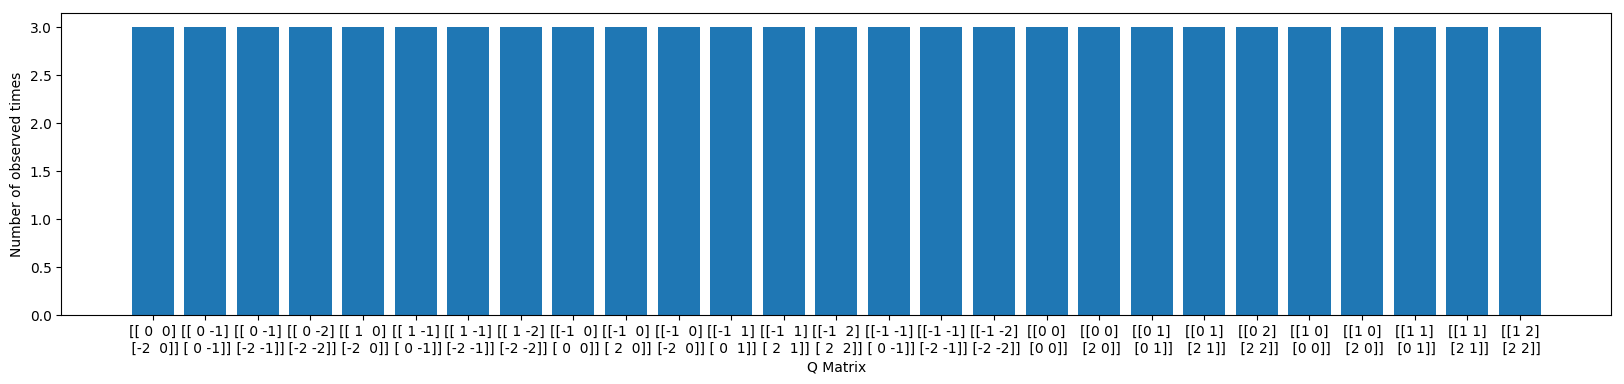

In [7]:
visualize_fixedQ(0,2,2,2)

visualize_fixedP(0,0,1,0,0,1,1,1,0)
visualize_fixedP(0,1,0,0,0,1,1,1,1)
visualize_fixedP(0,1,1,0,0,1,1,1,1)
visualize_fixedP(1,0,0,0,1,1,0,1,1)
visualize_fixedP(1,0,1,0,0,1,1,1,0)

少なくとも来週までには、ベイズの定理が成り立っているか上2つの関数を使って確かめる。

この総当たり戦は、ピクセル数が増えると指数的に計算量も増えるため、現実的ではない。ので、ベイジアンネットを使うとうまくいくかも。。？ by橋爪

In [8]:
cursor.execute("select count(*) from data_set;")
cursor.fetchall()

[(41472,)]

In [15]:
ARRAY = np.array([[1,2,3],[4,5,6]])
print(ARRAY.data)

TypeError: 'memoryview' object is not callable